In [1]:
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tifffile import TiffFile
from scipy import sparse as ss
from sklearn.preprocessing import normalize
%run ../src/geo_helpers.py

In [2]:
files = glob.glob('../data/raw/Version_4_DMSP-OLS_Nighttime_Lights_Time_Series/*')
files

['../data/raw/Version_4_DMSP-OLS_Nighttime_Lights_Time_Series/F101992.v4b_web.stable_lights.avg_vis.tif.npz',
 '../data/raw/Version_4_DMSP-OLS_Nighttime_Lights_Time_Series/F101993.v4b_web.stable_lights.avg_vis.tif.npz',
 '../data/raw/Version_4_DMSP-OLS_Nighttime_Lights_Time_Series/F121994.v4b_web.stable_lights.avg_vis.tif.npz',
 '../data/raw/Version_4_DMSP-OLS_Nighttime_Lights_Time_Series/F121995.v4b_web.stable_lights.avg_vis.tif.npz',
 '../data/raw/Version_4_DMSP-OLS_Nighttime_Lights_Time_Series/F121996.v4b_web.stable_lights.avg_vis.tif.npz',
 '../data/raw/Version_4_DMSP-OLS_Nighttime_Lights_Time_Series/F141997.v4b_web.stable_lights.avg_vis.tif.npz',
 '../data/raw/Version_4_DMSP-OLS_Nighttime_Lights_Time_Series/F141998.v4b_web.stable_lights.avg_vis.tif.npz',
 '../data/raw/Version_4_DMSP-OLS_Nighttime_Lights_Time_Series/F141999.v4b_web.stable_lights.avg_vis.tif.npz',
 '../data/raw/Version_4_DMSP-OLS_Nighttime_Lights_Time_Series/F142000.v4b_web.stable_lights.avg_vis.tif.npz',
 '../data/

In [12]:
%%time
# for i in range(1,len(files)):
for i in range(19,22):
    A = np.load(files[i-1])['arr_0']
    B = np.load(files[i])['arr_0']
    C = np.diff(np.stack([A, B]).astype(float), axis=0) # convert because it's `uint8` type
    np.savez_compressed(files[i]
                        .replace('raw','interim')
                        .replace('Series','Returns'),
                        C[0])

CPU times: user 2min 25s, sys: 1min 51s, total: 4min 16s
Wall time: 5min 3s


## Returns

In [3]:
# RETURNS
images_returns = np.stack(
    [np.load('../data/interim/Version_4_DMSP-OLS_Nighttime_Lights_Time_Returns/F182010.v4d_web.stable_lights.avg_vis.tif.npz')['arr_0'],
     np.load('../data/interim/Version_4_DMSP-OLS_Nighttime_Lights_Time_Returns/F182011.v4c_web.stable_lights.avg_vis.tif.npz')['arr_0'],
     np.load('../data/interim/Version_4_DMSP-OLS_Nighttime_Lights_Time_Returns/F182012.v4c_web.stable_lights.avg_vis.tif.npz')['arr_0']])

In [13]:
sub_img.mean()

-0.023544444444444444

0.511922222222
-0.138322222222
-0.0235444444444


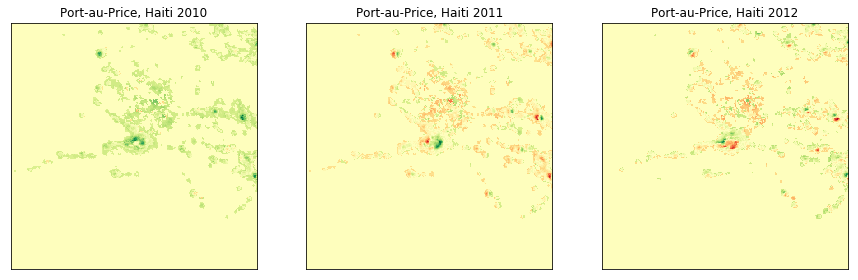

In [19]:
location = as_pixels(target_coords={'lat':18.53,'lng':-72.34})
d = 150
fig, ax = plt.subplots(1,3,figsize=(15,10))
for i, axi in enumerate(ax.flat):
    sub_img = images_returns[i,location[0]-d:location[0]+d,location[1]-d:location[1]+d]
    print(sub_img.mean())
    max_abs = max(abs(sub_img.max()), abs(sub_img.min()))
    axi.imshow(sub_img, vmin=-max_abs, vmax=max_abs, cmap='RdYlGn',)
    axi.set(xticks=[], yticks=[],title='Port-au-Price, Haiti ' + str(2010+i))
 
plt.show()

## Absolutes

In [49]:
# ABSOLUTES
images_absolutes = np.stack(
    [np.load('../data/raw/Version_4_DMSP-OLS_Nighttime_Lights_Time_Series/F162009.v4b_web.stable_lights.avg_vis.tif.npz')['arr_0'],
     np.load('../data/raw/Version_4_DMSP-OLS_Nighttime_Lights_Time_Series/F182010.v4d_web.stable_lights.avg_vis.tif.npz')['arr_0'],
     np.load('../data/raw/Version_4_DMSP-OLS_Nighttime_Lights_Time_Series/F182011.v4c_web.stable_lights.avg_vis.tif.npz')['arr_0']])

In [50]:
images_absolutes.mean(axis=(1,2))

array([ 0.42756738,  0.64357693,  0.53037359])

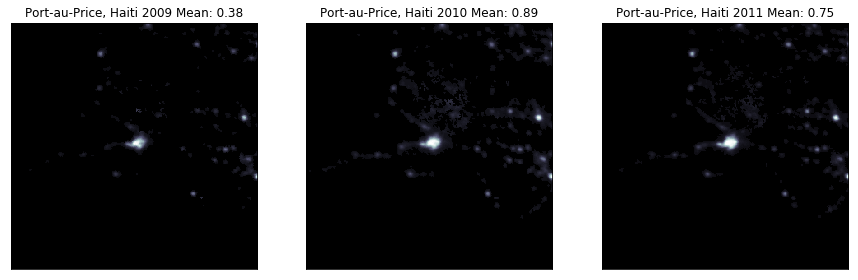

In [56]:
location = as_pixels(target_coords={'lat':18.53,'lng':-72.34})
d = 150
fig, ax = plt.subplots(1,3,figsize=(15,10))
for i, axi in enumerate(ax.flat):
    sub_img = images_absolutes[i][location[0]-d:location[0]+d,location[1]-d:location[1]+d]
    axi.imshow(sub_img,cmap='bone',)
    axi.set(xticks=[], yticks=[],title='Port-au-Price, Haiti ' + str(2009+i) + ' Mean: {:.2f}'.format(sub_img.mean()))
 
plt.show()

In [ ]:
df_emdat = pd.read_csv('../data/external/emdat.csv', encoding= "ISO-8859-1")
df_emdat.columns

In [ ]:
df_emdat.sort_values('Total deaths', ascending=False)